In [2]:
import tensorflow as tf



source_dir = "C:/Users/User/OneDrive/Desktop/KLASIK TAIDI/Semester 6/Bangkit/Capstone/archive/Dataset BISINDO/datatrain"

validate_dir = "C:/Users/User/OneDrive/Desktop/KLASIK TAIDI/Semester 6/Bangkit/Capstone/archive/Dataset BISINDO/datatest"


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    fill_mode = 'nearest',
                    interpolation_order=1,
                    
                    )

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.99
                    )

In [4]:
train_generator = train_datagen.flow_from_directory(
        source_dir,  # direktori data latih
        subset='training',
        batch_size=32,
        target_size=(150, 150),
        shuffle=True,
        class_mode='categorical')


validation_generator = test_datagen.flow_from_directory(
        validate_dir,
        batch_size=32,
        subset='validation',
        target_size=(150, 150),
        shuffle=True,
        class_mode='categorical'
        )

Found 1663 images belonging to 26 classes.
Found 390 images belonging to 26 classes.


In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.90:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model = Sequential()


model.add(Conv2D(64,kernel_size= (3,3), strides = 1, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 2, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(26, activation='softmax'))

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 36, 36, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │        26,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,101,130 (4.20 MB)

 Trainable params: 1,101,130 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:


model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])



In [16]:
callbacks = myCallback()
history = model.fit(
      train_generator,
      steps_per_epoch=30,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2,
      callbacks=[callbacks])

Epoch 1/30


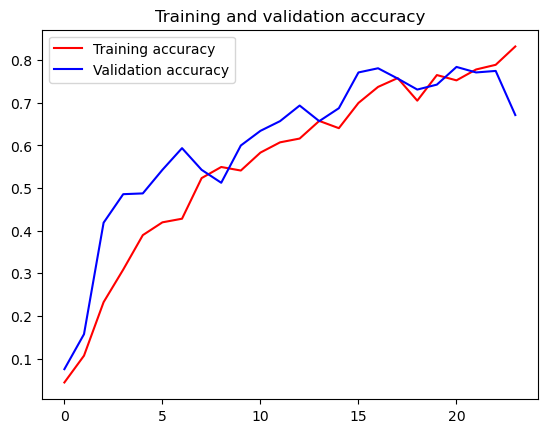

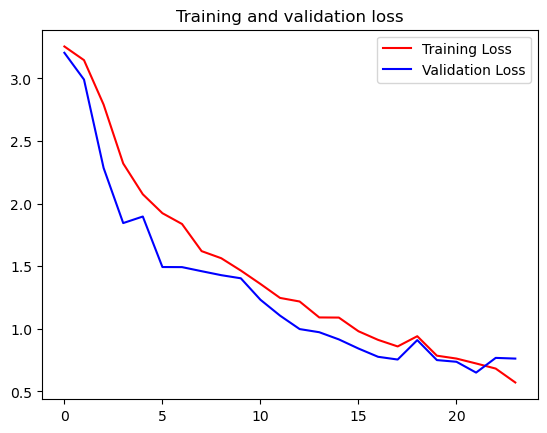

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')

plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')

plt.plot(epochs, val_loss, 'b', label='Validation Loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()

In [15]:
Valclass = validation_generator.class_indices
print(Valclass)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


Dibuat oleh  Klasik Solafide Kabor Mambri Taidi dengan username klasik_solafide_kabo